## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df.loc[:,'Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Applications/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


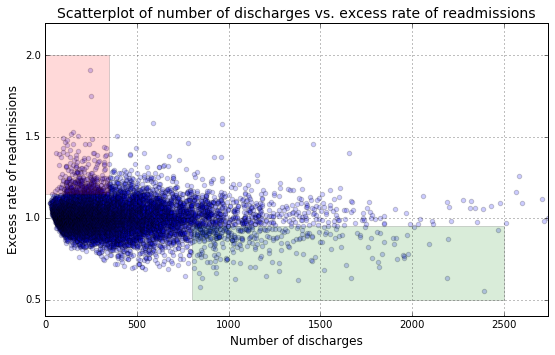

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Discussion
#### A. The above analysis is based on visual interpretation of a visualization of the relationship between excess readmission ratio (ERR).  The overall impression of a downward trend is influenced by two maximal points for ERR that fall in the red zone of the graphic.  The two statistics mentioned in section B. are provided without statistical analysis.  Thus, the conclusion in C. that there is a statistical difference is unsupported.  It remains unclear why the author recommends that hospitals that have fewer than 300 discharges be targeted carte blanc for measures to improve patient outcomes.  Inspection of the graphic indicates that many of these hospitals have ERR values that are below one (1), and the above analysis and recommendations unjustifiably ignore the fact that fully 40% of the larger hospitals have ERR values over 1.0.

#### Below, I construct an examination of the data preliminary to the use of parametric statistical methods, ones based on the central limit theorem.  In no case are the variables under consideration normally distributed. This suggests that the means of these values may also not be distributed normally.  I examined the correlation of ERR with number of discharges using a Spearman rank correlation and found that, in fact, there is a highly significant negative correlation, but that its value was 0.07.  I also examined the mean ERR of the 1000 hospitals with the lowest and highest numbers of discharges, and conducted a randomization test of significance.  The difference in ERR between the groups is highly significant, but the effect size of 3% suggests that the difference is actually quite small on average. This suggests that while the relationship has statistical significance, the number of discharges is only very weakly related to ERR, drawing into question the validity of basing policy simply on hospital size.

#### Focusing on the statistical significance here as a basis of policy would be a mistake, since the relationship between ERR and discharge values is weak. Statistical significance is driven by the large number of observations, not a large effect size.  It would be better to identify hospitals with high ERR values and concentrate efforts specifically on these hospitals, regardless of their size, instead of creating an additional reporting burden on all smaller hospitals.  This is supported by the fact that, in the graphic above, one notes that there are a substantial number of hospitals with high discharge values that have ERR values well over 1.0.  The proposed policy, above, would effectively ignore these larger hospitals.  In fact, larger hospitals with high ERR values could well present a greater problem than small hospitals because the number of patients that are affected is potentially much greater.  Improving care at large hospitals with high ERR values could potentially have a greater impact than focusing on small hospitals.  This possibility should be investigated in further analyses.

In [5]:
from scipy import stats as stats

In [6]:
df=clean_hospital_read_df.iloc[81:-3,:]

In [7]:
df.columns

Index([u'Hospital Name', u'Provider Number', u'State', u'Measure Name',
       u'Number of Discharges', u'Footnote', u'Excess Readmission Ratio',
       u'Predicted Readmission Rate', u'Expected Readmission Rate',
       u'Number of Readmissions', u'Start Date', u'End Date'],
      dtype='object')

#### First, let's make some shorter variable names

In [166]:
df.loc[:,'numdis']=df['Number of Discharges']
df.loc[:,'excess_read']=df['Excess Readmission Ratio']

#### And lets get another statistical package

In [9]:
import statsmodels.api as sm

#### Now that we have gotten rid of the hospitals with zero discharges, lets look at what the minimum number of dicharges is

In [10]:
df['numdis'].min()

25

In [11]:
ndis=df['numdis']

#### Let's also get the log of the number of discharges

In [12]:
lndis=np.log(df['numdis'])


In [13]:
lndis.head()

1832    3.218876
1699    3.295837
1774    3.332205
1853    3.367296
1290    3.401197
Name: numdis, dtype: float64

#### We can get an idea of the degree to which the distribution of the number of discharges approaches a normal distribution.

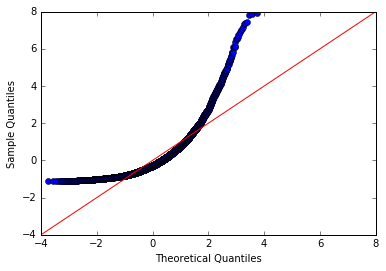

In [14]:
sm.graphics.qqplot(ndis, line='45',fit=True);

#### It actually doesn't come very close at all.  So, let's look at the QQ-plot of the natural log of the number of discharges

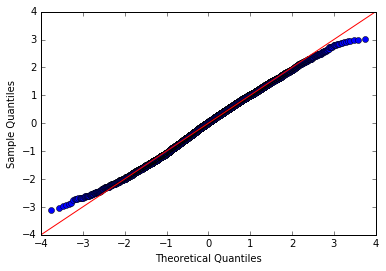

In [15]:
sm.graphics.qqplot(lndis, line='45',fit=True);

#### This also deviates from normal, though perhaps less strongly.  How about the excess discharge ratio? Is it nearly normally distributed?

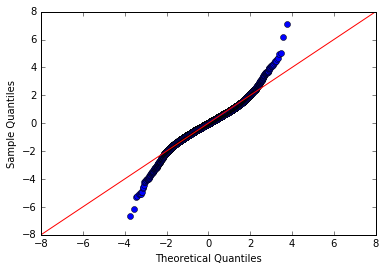

In [116]:
sm.graphics.qqplot(np.log(df.excess_read), line='45',fit=True);

#### From the above plot, we see that the natural log of the excess discharge ration is also not normally distributed.  I tried a number of other transformations and it was impossible to transform it to anything near normality.

#### Do any other measures that one might use to indicate excess discharges approach normality, or be transformed to it?  I tried several, which we see below.

In [53]:
predicted=df['Predicted Readmission Rate']
expected=df['Expected Readmission Rate']

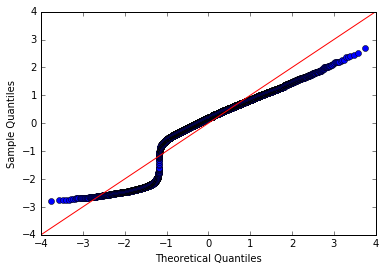

In [64]:
sm.graphics.qqplot(predicted, line='45',fit=True);

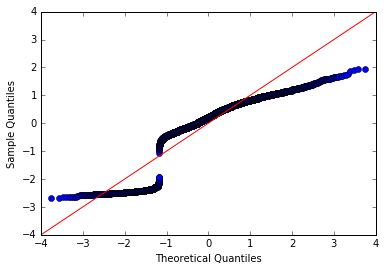

In [65]:
sm.graphics.qqplot(expected, line='45',fit=True);

In [92]:
sub=predicted-expected
test=(sub - sub.min())


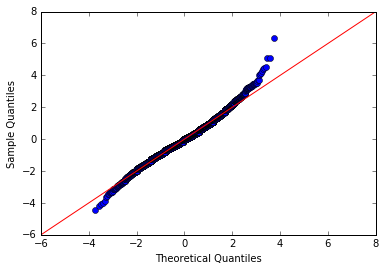

In [114]:
sm.graphics.qqplot(sub, line='45',fit=True);

#### The difference between predicted and expected readmissions also resisted transformation to normality. However, compared to the measures above, it was relatively close to normal.

In [117]:
x1 = [a for a in lndis]
y1 = list(sub)

#### So, I plotted the difference between expected and predicted readmissions against the number of discharges.  I then calculated the magnitude of the correlation, using both a test based on the normal assumption and a rank-order correlation. This included a few quick tests of the significance

''

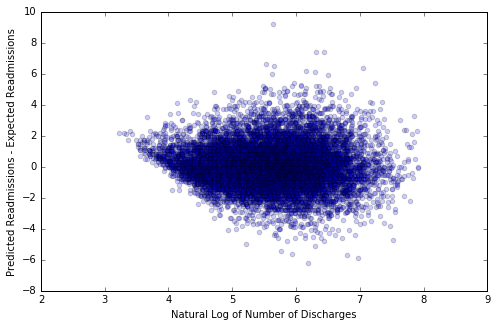

In [131]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x1, y1,alpha=0.2)
ax.set_xlabel("Natural Log of Number of Discharges")
ax.set_ylabel("Predicted Readmissions - Expected Readmissions")
;

In [122]:
stats.spearmanr(x1,y1)   #y1 is the difference between the expected and predicted readmission rates.

SpearmanrResult(correlation=-0.059337525210372229, pvalue=1.9339227832853647e-10)

In [124]:
stats.pearsonr(x1,y1)

(-0.057665703255876812, 6.1389882464264563e-10)

In [132]:
stats.spearmanr(x,y) # This is a rank-order correlation of the number of discharges (x) vs. the excess readmission ratio (y)

SpearmanrResult(correlation=-0.076858037232686305, pvalue=1.5672494791925461e-16)

#### The above values for both the Spearman and Pearson correlations between number of discharges and either ERR or the difference between predicted and expected readmissions suggest that the correlations are very, very weak, although statistically significant.

####  Another test that we can assemble is a randomization test to compare mean ERR between 1000 hospitals with the lowest numbers of discharges and the thousand hospitals with the greatest numbers of discharges.  This is done in the lines below.

In [136]:
df=df.sort_values("numdis")

In [145]:
df.numdis[-1000:].tail()

136     2581
1698    2596
1242    2705
8126    2716
6643    2740
Name: numdis, dtype: int64

#### Below we see the mean excess discharge rates for the 1000 hospitals with the highest and lowest discharge rates.  

In [178]:
excess_hi_dis=df.excess_read[-1000:]
print "Statistics on excess readmission ratio for the 1000 hospitals with the highest number of discharges"
print "The mean excess readmission rate is ", excess_hi_dis.mean()
print "The standard deviation of the readmission rate is ", excess_hi_dis.std()

Statistics on excess readmission ratio for the 1000 hospitals with the highest number of discharges
The mean excess readmission rate is  0.9885291
The standard deviation of the readmission rate is  0.116401147461


In [143]:
df.numdis.iloc[:1000].mean()

70.692

In [179]:
excess_low_dis=df.excess_read[:1000]
print "Statistics on excess readmission ratio for the 1000 hospitals with the smallest number of discharges"
print "The mean excess readmission rate is ", excess_low_dis.mean()
print "The standard deviation of the readmission rate is ", excess_low_dis.std()

Statistics on excess readmission ratio for the 1000 hospitals with the smallest number of discharges
The mean excess readmission rate is  1.0245495
The standard deviation of the readmission rate is  0.0524704876271


### Here is the effect size that distinguishes the two groups of hospitals in terms of their ERR values.  The effect size is very small, about 3.5%.

In [182]:
effect_size=excess_low_dis.mean() - excess_hi_dis.mean()
print "The ERR rate of low discharge hospitals ", 100* effect_size/excess_hi_dis.mean(),"percent greater than that of high discharge hospitals"

The ERR rate of low discharge hospitals  3.64383810249 percent greater than that of high discharge hospitals


#### Below, both QQ-plots and the Shapiro-Wilks statistic suggest that the excess readmission ratio in the two groups is not normally distributed.  Attempts to transform to normality were not successful (not shown).

In [151]:
stats.shapiro(excess_hi_dis)

(0.9794082641601562, 1.0807477829333223e-10)

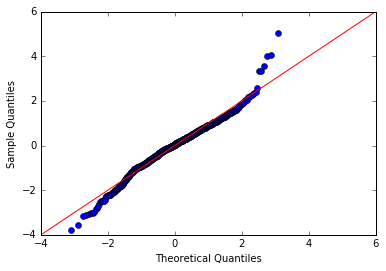

In [156]:
sm.graphics.qqplot(excess_hi_dis, line='45',fit=True);

In [157]:
stats.shapiro(excess_low_dis)

(0.9153404235839844, 3.41225918184492e-23)

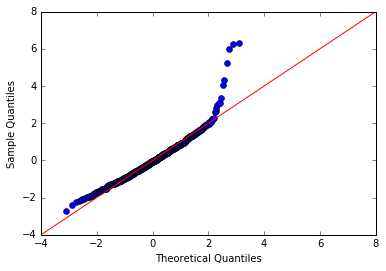

In [158]:
sm.graphics.qqplot(np.log(excess_low_dis), line='45',fit=True);

#### So, here is the randomization test, which will determine whether the two groups differ statistically.

In [172]:
class HypothesisTest(object):
    """Represents a hypothesis test."""

    def __init__(self, data):
        """Initializes.

        data: data in whatever form is relevant
        """
        self.data = data
        self.MakeModel()
        self.actual = self.TestStatistic(data)
        self.test_stats = None

    def PValue(self, iters=1000):
        """Computes the distribution of the test statistic and p-value.

        iters: number of iterations

        returns: float p-value
        """
        self.test_stats = np.array([self.TestStatistic(self.RunModel()) 
                                       for _ in range(iters)])

        count = sum(self.test_stats >= self.actual)
        return count / iters

    def MaxTestStat(self):
        """Returns the largest test statistic seen during simulations.
        """
        return max(self.test_stats)

    def PlotHist(self, label=None):
        """Draws a Cdf with vertical lines at the observed test stat.
        """
        ys, xs, patches = plt.hist(ht.test_stats, color=COLOR4)
        plt.vlines(self.actual, 0, max(ys), linewidth=3, color='0.8')
        plt.xlabel('test statistic')
        plt.ylabel('count')

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        raise UnimplementedMethodException()

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        pass

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        raise UnimplementedMethodException()

#### The test statistic that we calculate is the difference between the mean value of excess readmission ratio of the two groups.  Under the null hypothesis of no difference between groups, the expected value of this statistic is zero.

In [173]:
class DiffMeansPermute(HypothesisTest):
    """Tests a difference in means by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: data in whatever form is relevant        
        """
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        """Build a model of the null hypothesis.
        """
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [176]:
# some nicer colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

In [174]:
data = (excess_low_dis, excess_hi_dis)
ht = DiffMeansPermute(data)
p_value = ht.PValue(iters=1000)
print('\nmeans permute excess readmissions')
print('p-value =', p_value)
print('actual =', ht.actual)
print('ts max =', ht.MaxTestStat())


means permute excess readmissions
('p-value =', 0)
('actual =', 0.036020400000000175)
('ts max =', 0.013169999999999793)


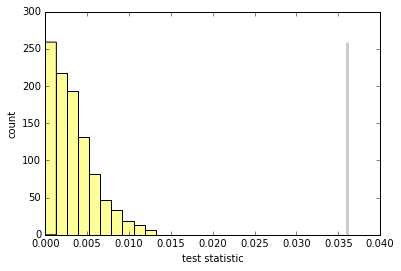

In [177]:
ht.PlotHist()

#### Evidently, the difference in excess readmission ratio between the two groups of hospitals is highly significant.  None of the values in the randomized distributions approach the magnitude of the observed value of the test statistic.